# **Experiment 5.3:** Sequence Text Classification using LSTM

**Objective:**
To classify text sequences using LSTM, such as identifying whether an SMS is spam or not.

**Dataset :SMS Spam Collection**

Step 1: Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical


Step 2: Load and Preprocess the Text Data

In [4]:
# Load dataset
data = pd.read_csv('spam.csv', encoding='latin-1')[['v1', 'v2']]
data.columns = ['label', 'message']

# Encode labels: spam = 1, ham = 0
data['label'] = data['label'].map({'ham': 0, 'spam': 1})

print(data.head())


   label                                            message
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...


Step 3: Tokenize and Pad Text

In [7]:
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['message'])

X = tokenizer.texts_to_sequences(data['message'])
X = pad_sequences(X, maxlen=max_len)

y = np.array(data['label'])


Step 4: Split Data

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


 Step 5: Build LSTM Model

In [9]:
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=64, input_length=max_len))
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 5: Build the LSTM Model

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=seq_length))
model.add(LSTM(256, return_sequences=False))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Step 6: Train the Model

In [10]:
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 8s 79ms/step - accuracy: 0.8410 - loss: 0.4154 - val_accuracy: 0.9695 - val_loss: 0.1138
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 95ms/step - accuracy: 0.9824 - loss: 0.0693 - val_accuracy: 0.9839 - val_loss: 0.0665
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 83ms/step - accuracy: 0.9902 - loss: 0.0351 - val_accuracy: 0.9839 - val_loss: 0.0609
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.9933 - loss: 0.0280 - val_accuracy: 0.9865 - val_loss: 0.0499
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 13s 114ms/step - accuracy: 0.9980 - loss: 0.0090 - val_accuracy: 0.9839 - val_loss: 0.0553


Step 7: Plot Training Accuracy and Accuracy

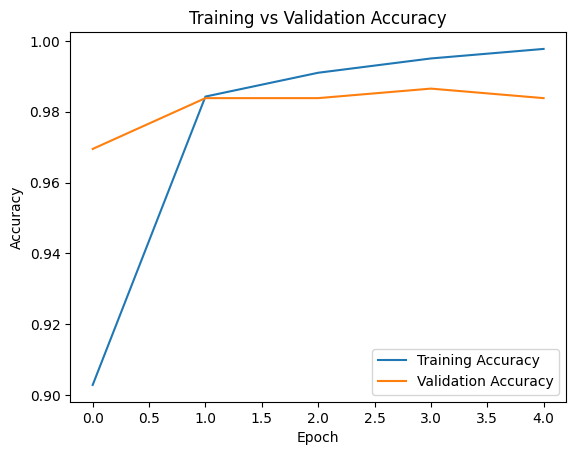

In [11]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()
plt.show()


Step 8: Evaluate Model
python



In [12]:
# Predictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

# Classification Report
print(classification_report(y_test, y_pred_classes, target_names=["Ham", "Spam"]))


35/35 ━━━━━━━━━━━━━━━━━━━━ 2s 55ms/step
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



Step 9: Confusion Matrix

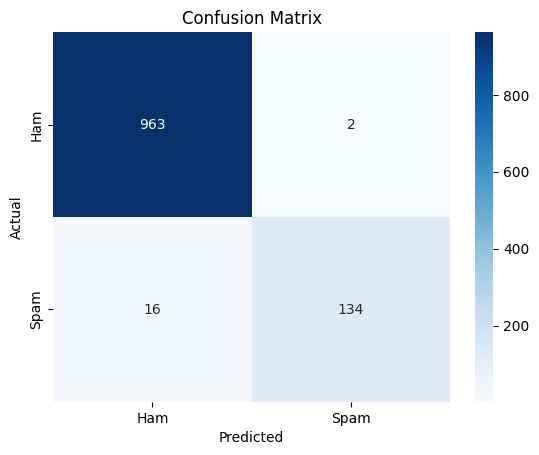

In [13]:
cm = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# **Declaration**

I, Shruti Deokar, confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: https://github.com/shrutideokar/deeplearning

Signature: Shruti Jitendra Deokar